In [ ]:
!pip install kaggle

In [ ]:
# configuration the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# dataset api
!kaggle competitions download -c cifar-10

 99% 709M/715M [00:06<00:00, 89.0MB/s]
100% 715M/715M [00:06<00:00, 116MB/s] 


In [ ]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [ ]:
!pip install py7zr    # this is a 7z file we can't extract it using zip file so we've to install this lib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 835.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.8/413.8 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 31.6 MB/s eta 0:00:00


In [ ]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')     # mode r means reading this file
archive.extractall()     #archive.extractall(path='/content/Training data')
archive.close()

In [ ]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


Importing the dependencies

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
# checking how many files are there in train folder
filenames = os.listdir('/content/train')  # it will list all the files and folders present in the directory

In [ ]:
type(filenames)

list

In [ ]:
len(filenames)   # 50k images for 10 diff classes

50000

In [ ]:
# sample of images we are having
print(filenames[0:5])    # first 5 file in the list
print(filenames[-5:])    # last 5 file in the list

['30978.png', '18964.png', '29905.png', '26545.png', '8350.png']
['3194.png', '48488.png', '6780.png', '6646.png', '30660.png']


Labels processing

In [ ]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [ ]:
labels_df.shape

(50000, 2)

In [ ]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
labels_df[labels_df['id'] == 7796]

,id,label
7795,7796,frog


In [ ]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [ ]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [ ]:
labels_df['label'].value_counts()

label
frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: count, dtype: int64

In [ ]:
labels_dictionary = {'airplane':0,'automobile':1,'bird':2,'cat':3,'deer':4,'dog':5,'frog':6,'horse':7,'ship':8,'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]   # it will iterate from frog to airplane

In [ ]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


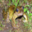

In [ ]:
# displaying sample image
import cv2
from google.colab.patches import cv2_imshow    # and this cv2_imshow will convert this numpy array and display in form of an image

img = cv2.imread('/content/train//17961.png')  # cv2.imread will convert this image to a numpy array
cv2_imshow(img)

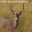

In [ ]:
import cv2
from google.colab.patches import cv2_imshow    # and this cv2_imshow will convert this numpy array and display in form of an image

img = cv2.imread('/content/train//8583.png')  # cv2.imread will convert this image to a numpy array
cv2_imshow(img)

In [ ]:
labels_df[labels_df['id'] == 8583]

,id,label
8582,8583,deer


In [ ]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
id_list = list(labels_df['id'])

In [ ]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


Image Processing

In [ ]:
# convert images to numpy arrays
train_data_folder = '/content/train/'
data = []    # we've an empty list
 # taking 50k images and converting them to numpy array

for id in id_list:
  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [ ]:
type(data)

list

In [ ]:
len(data)

50000

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape    #(height, weight, rgb)

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
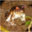

In [ ]:
data[0]    # 0 -> 0....255 -> 1

In [ ]:
# convert images list and labels list to numpy arrays
X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)      # it contains 50k labels

(50000, 32, 32, 3)
(50000,)


Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [ ]:
# Scaling the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
X_train_scaled

array([[[[0.81960784, 0.82352941, 0.79607843],
         [0.83529412, 0.83921569, 0.81960784],
         [0.85490196, 0.85882353, 0.84313725],
         ...,
         [0.49803922, 0.29019608, 0.15294118],
         [0.47843137, 0.26666667, 0.1372549 ],
         [0.45490196, 0.24705882, 0.1254902 ]],

        [[0.82352941, 0.82352941, 0.79215686],
         [0.83529412, 0.83921569, 0.81176471],
         [0.85490196, 0.8627451 , 0.83921569],
         ...,
         [0.48627451, 0.2745098 , 0.1372549 ],
         [0.4745098 , 0.2627451 , 0.12941176],
         [0.48235294, 0.27058824, 0.14117647]],

        [[0.80784314, 0.80392157, 0.76470588],
         [0.81960784, 0.81960784, 0.79215686],
         [0.83529412, 0.84313725, 0.81960784],
         ...,
         [0.48627451, 0.2745098 , 0.14509804],
         [0.51372549, 0.30196078, 0.16470588],
         [0.51372549, 0.30588235, 0.16078431]],

        ...,

        [[0.49803922, 0.42352941, 0.38039216],
         [0.54117647, 0.47843137, 0.43137255]

Building the neural network

In [ ]:
import tensorflow as tf
from tensorflow import keras      # keras helps us to use this library in easier way

In [ ]:
num_of_classes = 10

# setting up the layers of neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),      # flatten is like vector (single dimension)
    keras.layers.Dense(64, activation='relu'),        # we should use power of 2 for here's neuron as it iscomputationally efficient to maximize the purpose of ram CPU
    keras.layers.Dense(num_of_classes, activation='softmax')    # o/p layer -> isme no. of neurons classes k num jitta hi hota h.....softmax can we use when we've multi class
    ])

# atlast we look into these 10 classes and see which neuron is giving the highest probability and that will be the image of that num

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)   # epochs = 10 means my model go through the data 10 times

Epoch 1/10
1125/1125 [==============================] - 12s 10ms/step - loss: 1.9698 - acc: 0.2929 - val_loss: 1.8096 - val_acc: 0.3445
Epoch 2/10
1125/1125 [==============================] - 7s 7ms/step - loss: 1.8120 - acc: 0.3501 - val_loss: 1.7634 - val_acc: 0.3585
Epoch 3/10
1125/1125 [==============================] - 8s 7ms/step - loss: 1.7604 - acc: 0.3671 - val_loss: 1.7742 - val_acc: 0.3490
Epoch 4/10
1125/1125 [==============================] - 11s 9ms/step - loss: 1.7334 - acc: 0.3784 - val_loss: 1.7918 - val_acc: 0.3595
Epoch 5/10
1125/1125 [==============================] - 11s 10ms/step - loss: 1.7126 - acc: 0.3853 - val_loss: 1.7237 - val_acc: 0.3825
Epoch 6/10
1125/1125 [==============================] - 6s 5ms/step - loss: 1.6993 - acc: 0.3900 - val_loss: 1.6966 - val_acc: 0.3850
Epoch 7/10
1125/1125 [==============================] - 7s 6ms/step - loss: 1.6859 - acc: 0.3947 - val_loss: 1.6950 - val_acc: 0.3815
Epoch 8/10
1125/1125 [==============================] - 1

**ResNet50**

In [ ]:
from tensorflow.keras import Sequential, models, layers    # we're going to stack all these layers in sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [ ]:
# this convolutional_base is ResNet50
convolutional_base = ResNet50(weights='imagenet',include_top = False, input_shape=(256,256,3))
convolutional_base.summary()

# imagenet is a image database where several models are train. It contains millions of images.....weights that are derived while training with this particular data
# include_top = False means it will import ResNet50 model but it will drop the final layer which is the output layer and add we'll add our own o/p layer with 10 neurons as we've
# 256, 256, 3 this is the shape in which ResNet50 will take the images

94765736/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                      

In [ ]:
# this is the convolutional_base which doesn't have the o/p layer

In [ ]:
# going to add some layers to this convolutional_base
model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))    # 2,2 means height and width will be multiplied by 2 times....32x2=64,64x2=128,128x2=256 that's why we are doing it three times
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())   # it ensures that all the value are normalised
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dropout(0.5))           # it turns off few neurons....it will give the o/p 0 for them, prevents overfitting
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation = 'softmax'))

In [ ]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])   # lr is learning rate it determine how much our weights are going to change

In [ ]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
 139/1125 [==>...........................] - ETA: 10:27:59 - loss: 8.9420 - acc: 0.1203

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuraacy')
plt.legend()
plt.show()